### 1. Randomness

In [1]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
two_choice = make_array('treatment', 'control')
np.random.choice(two_choice)

'control'

In [3]:
np.random.choice(two_choice, 10)

array(['control', 'control', 'control', 'treatment', 'control',
       'treatment', 'treatment', 'control', 'control', 'treatment'],
      dtype='<U9')

In [9]:
'Dog' > 'Catastrophe' > 'Cat'

True

In [11]:
np.random.choice(two_choice, 10) == 'treatment'

array([ True, False,  True, False, False, False,  True,  True, False, False], dtype=bool)

In [12]:
tosses = make_array('Tails', 'Heads', 'Tails', 'Heads', 'Heads')
tosses == 'Heads'

array([False,  True, False,  True,  True], dtype=bool)

In [13]:
np.count_nonzero(tosses == 'Heads')

3

### 2. Conditional Statements

In [14]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [23]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'neither positive nor negative'

In [25]:
sign(-2), sign(0)

('negative', 'neither positive nor negative')

In [26]:
def one_bet(x):
    """Returns my net gain if the die shows x spots"""
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [27]:
one_bet(1), one_bet(2), one_bet(3), one_bet (4), one_bet(5), one_bet(6)

(-1, -1, 0, 0, 1, 1)

In [45]:
one_bet(np.random.choice(np.arange(1, 7)))

-1

### 3. Iteration

In [46]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [47]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [53]:
bet_on_one_roll()

0

In [54]:
for i in np.arange(10):
    print(bet_on_one_roll())

1
1
-1
1
1
0
0
0
1
-1


In [55]:
pets = make_array('Cat', 'Dog')
np.append(pets, 'Another Pet')

array(['Cat', 'Dog', 'Another Pet'],
      dtype='<U11')

In [57]:
pets #unchanged

array(['Cat', 'Dog'],
      dtype='<U3')

In [59]:
pets = np.append(pets, 'Another Pet')
pets #changed

array(['Cat', 'Dog', 'Another Pet', 'Another Pet'],
      dtype='<U11')

In [104]:
outcome = make_array()
for i in np.arange(300):
    outcome_of_roll = bet_on_one_roll()
    outcome = np.append(outcome, outcome_of_roll)

In [105]:
np.count_nonzero(outcome)

196

In [106]:
len(outcome)

300

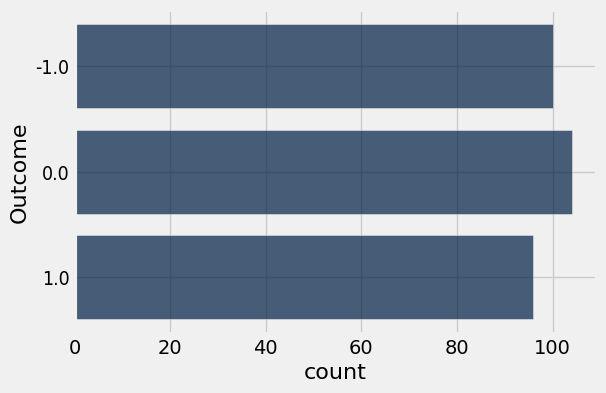

In [107]:
out_table = Table().with_column('Outcome', outcome)
out_table.group('Outcome').barh('Outcome')

### 4. Simulation

In [108]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np